In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
from string import punctuation
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

import spacy

from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

import contractions

In [358]:
# Ustawienie globalnego stylu dla wszystkich wykresów w notebooku
sns.set_theme(style="whitegrid", palette="tab10")

# Ustawienie właściwości siatki
plt.rcParams['axes.facecolor'] = 'white'  # Białe tło wykresów
plt.rcParams['grid.color'] = '#eaeaea'    # Kolor siatki - jasny szary
plt.rcParams['grid.linestyle'] = '-'      # Styl linii siatki - ciągła linia
plt.rcParams['grid.linewidth'] = 1        # Szerokość linii siatki
plt.rcParams['axes.edgecolor'] = 'white'  # Kolor krawędzi osi wykresów
plt.rcParams['axes.spines.top'] = False   # Usunięcie górnej krawędzi
plt.rcParams['axes.spines.right'] = False # Usunięcie prawej krawędzi
plt.rcParams['axes.spines.left'] = False  # Usunięcie lewej krawędzi
plt.rcParams['axes.spines.bottom'] = False# Usunięcie dolnej krawędzi
plt.rcParams['axes.titlepad'] = 20        # Odstęp tytułu wykresu od górnej krawędzi
plt.rcParams['axes.titlesize'] = 16       # Rozmiar czcionki tytułu wykresu
plt.rcParams['axes.labelsize'] = 12       # Rozmiar czcionki etykiet osi
plt.rcParams['xtick.labelsize'] = 12      # Rozmiar czcionki etykiet na osi X
plt.rcParams['ytick.labelsize'] = 12      # Rozmiar czcionki etykiet na osi Y

In [359]:
df = pd.read_csv('the_office_transcript.csv', index_col=0)
df

season  episode  scene  \
0           1        1      1   
1           1        1      1   
2           1        1      1   
3           1        1      1   
4           1        1      1   
...       ...      ...    ...   
59904       9       23    112   
59905       9       23    113   
59906       9       23    114   
59907       9       23    115   
59908       9       23    116   

                                                    line character  
0      All right Jim. Your quarterlies look very good...   Michael  
1             Oh, I told you. I couldn't close it. So...       Jim  
2      So you've come to the master for guidance? Is ...   Michael  
3             Actually, you called me in here, but yeah.       Jim  
4        All right. Well, let me show you how it's done.   Michael  
...                                                  ...       ...  
59904  It all seems so very arbitrary. I applied for ...     Creed  
59905  I just feel lucky that I got a chance to share...  Meredith  
59906  I'm happy that this was all filmed so I can re...   Phyllis  
59907  I sold paper at this company for 12 years. My ...       Jim  
59908  I thought it was weird when you picked us to m...       Pam  

[57973 rows x 5 columns]

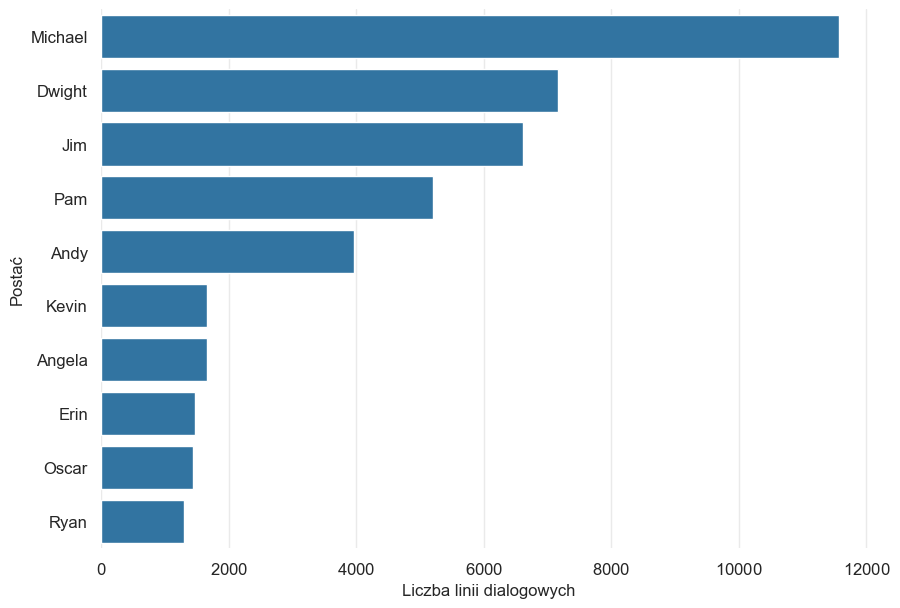

In [360]:
counts = df['character'].value_counts()[:10].sort_values(ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(x=counts, y=counts.index)
plt.xlabel('Liczba linii dialogowych')
plt.ylabel('Postać')
plt.savefig('plots/top_postaci_total.pdf')

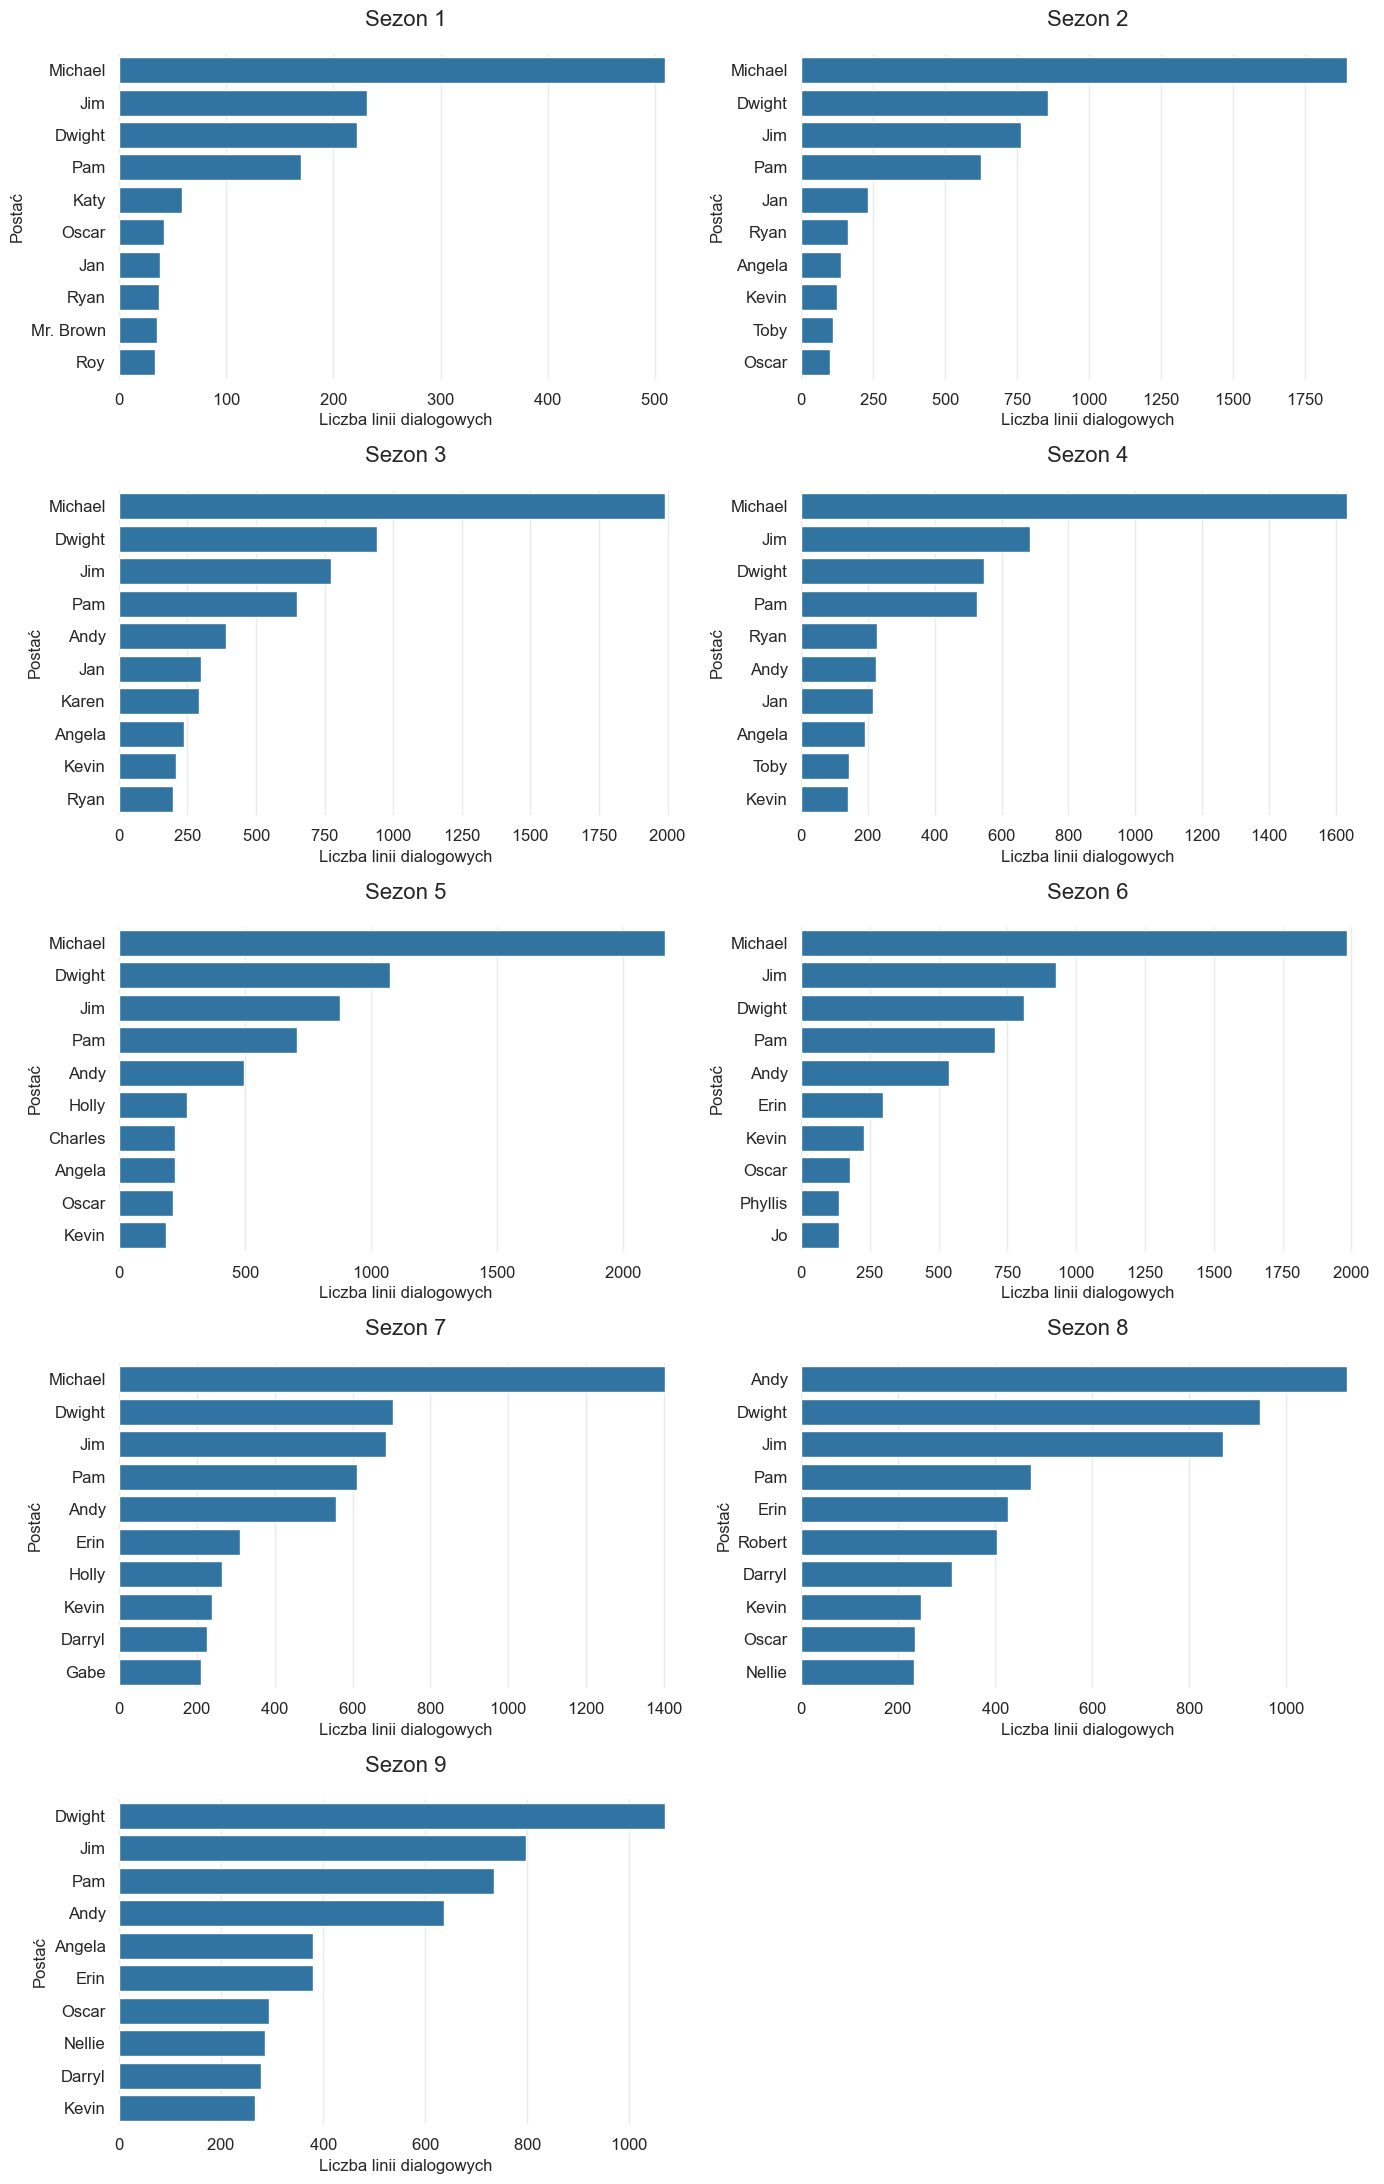

In [361]:
fig, axs = plt.subplots(5, 2, figsize=(14, 22))

unique_seasons = sorted(df['season'].unique())
for i, season in enumerate(unique_seasons):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    counts = df[df['season'] == season]['character'].value_counts().head(10)
    sns.barplot(x=counts.values, y=counts.index, ax=ax)
    ax.set_title(f'Sezon {season}')
    ax.set_xlabel('Liczba linii dialogowych')
    ax.set_ylabel('Postać')

if len(unique_seasons) < 10:
    axs[-1, -1].set_visible(False)

plt.tight_layout()
plt.savefig('plots/top_postaci_sezony_pionowo.pdf')

In [362]:
english_stopwords = stopwords.words('english')
custom_stopwords = ['oh', 'uh', 'um', 'yeah', 'okay', 'ok', 'right', 'alright', 'like', 'know', 'hey', 'gonna', 'huh', 'ah', 'ha', 'ay', 'ow', 
                    'hmm', 'mm', 'wow', 'whoa', 'whoah', 'woah', 'em', 'ooh', 'oooh', 'umm']
english_stopwords.extend(custom_stopwords)

tidytext_stopwords = pd.read_csv(
    "https://raw.githubusercontent.com/juliasilge/tidytext/master/data-raw/stop_words.csv"
)
more_stopwords = list(tidytext_stopwords['word'])
english_stopwords.extend(more_stopwords)

nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    text = contractions.fix(text)
    text = text.lower()
    text = re.sub(r'\[[^\]]*\]', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(f'[{re.escape(punctuation)}]', '', text)
    words = [word for word in text.split() if word not in english_stopwords]
    words = [word for word in words if len(word) > 2]
    lemmatized_words = [word.lemma_ for word in nlp(' '.join(words))]
    text = ' '.join(lemmatized_words)
    return text

In [363]:
df['line_preprocessed'] = df['line'].apply(lambda x: preprocess_text(x))
df

season  episode  scene  \
0           1        1      1   
1           1        1      1   
2           1        1      1   
3           1        1      1   
4           1        1      1   
...       ...      ...    ...   
59904       9       23    112   
59905       9       23    113   
59906       9       23    114   
59907       9       23    115   
59908       9       23    116   

                                                    line character  \
0      All right Jim. Your quarterlies look very good...   Michael   
1             Oh, I told you. I couldn't close it. So...       Jim   
2      So you've come to the master for guidance? Is ...   Michael   
3             Actually, you called me in here, but yeah.       Jim   
4        All right. Well, let me show you how it's done.   Michael   
...                                                  ...       ...   
59904  It all seems so very arbitrary. I applied for ...     Creed   
59905  I just feel lucky that I got a chance to share...  Meredith   
59906  I'm happy that this was all filmed so I can re...   Phyllis   
59907  I sold paper at this company for 12 years. My ...       Jim   
59908  I thought it was weird when you picked us to m...       Pam   

                                       line_preprocessed  
0                                jim quarterlies library  
1                                             tell close  
2                            master guidance grasshopper  
3                                                   call  
4                                                         
...                                                  ...  
59904  arbitrary apply job company hiring desk empty ...  
59905  feel lucky chance share crummy story dump pape...  
59906          happy filmed remember paper company write  
59907  sell paper company job speak client phone quan...  
59908  weird pick documentary ordinary paper company ...  

[57973 rows x 6 columns]

In [364]:
def get_top_n_words(text, n_words=10):
    words = text.split()
    word_counts = Counter(words)
    top_words = [word[0] for word in word_counts.most_common(n_words)]
    return top_words

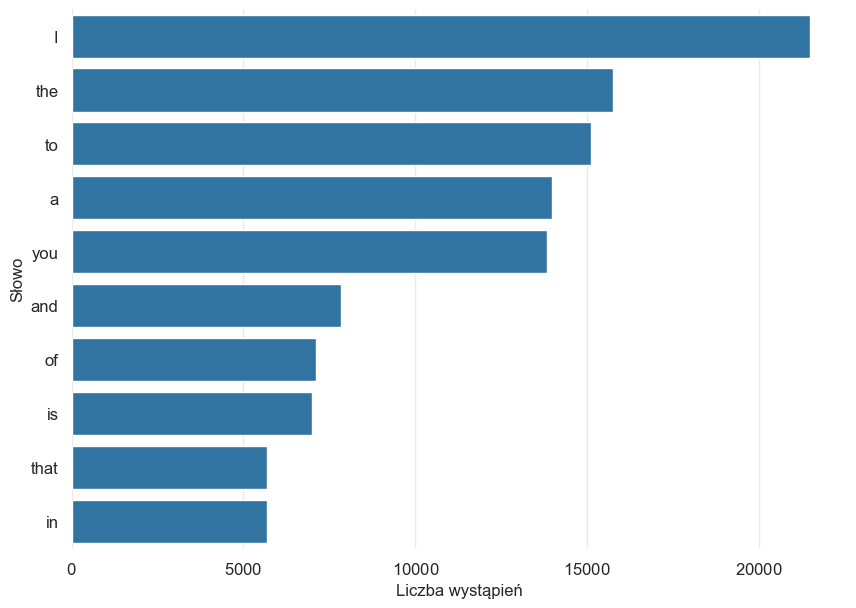

In [365]:
# fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 12))
plt.figure(figsize=(10, 7))

all_lines = ' '.join(df['line'])
top_words = get_top_n_words(all_lines)
counts = [all_lines.split().count(word) for word in top_words]

sns.barplot(x=counts, y=top_words)
# ax1.set_title('Top words in the dataset before preprocessing', fontsize=16)
plt.xlabel('Liczba wystąpień', fontsize=12)
plt.ylabel('Słowo', fontsize=12)
plt.savefig('plots/top_slowa_przed.pdf')

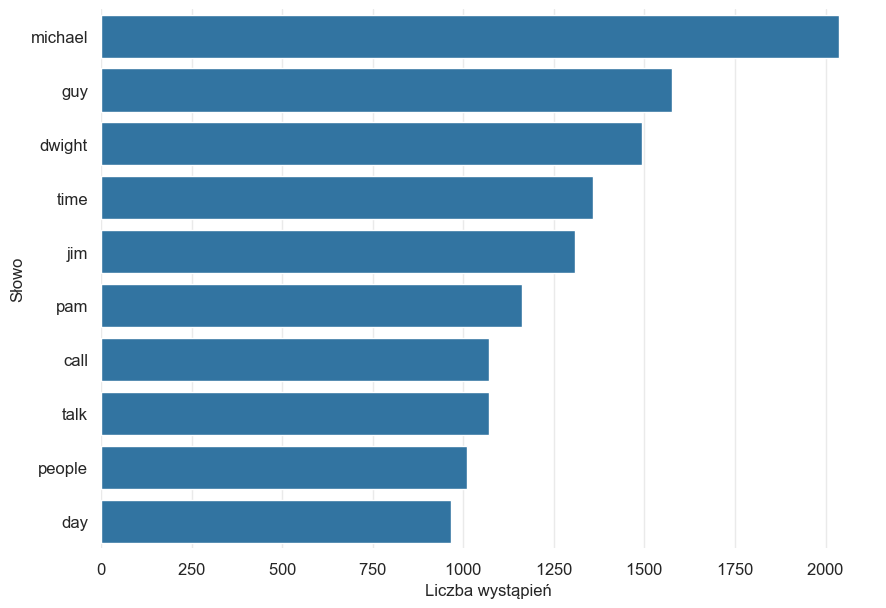

In [366]:
plt.figure(figsize=(10, 7))
all_lines = ' '.join(df['line_preprocessed'])
top_words = get_top_n_words(all_lines)
counts = [all_lines.split().count(word) for word in top_words]

sns.barplot(x=counts, y=top_words)
# ax2.set_title('Top words in the dataset after preprocessing', fontsize=16)
plt.xlabel('Liczba wystąpień', fontsize=12)
plt.ylabel('Słowo', fontsize=12)
# plt.tight_layout()

plt.savefig('plots/top_slowa_po.pdf')

In [367]:
top_characters = list(df['character'].value_counts()[:10].sort_values(ascending=False).index)

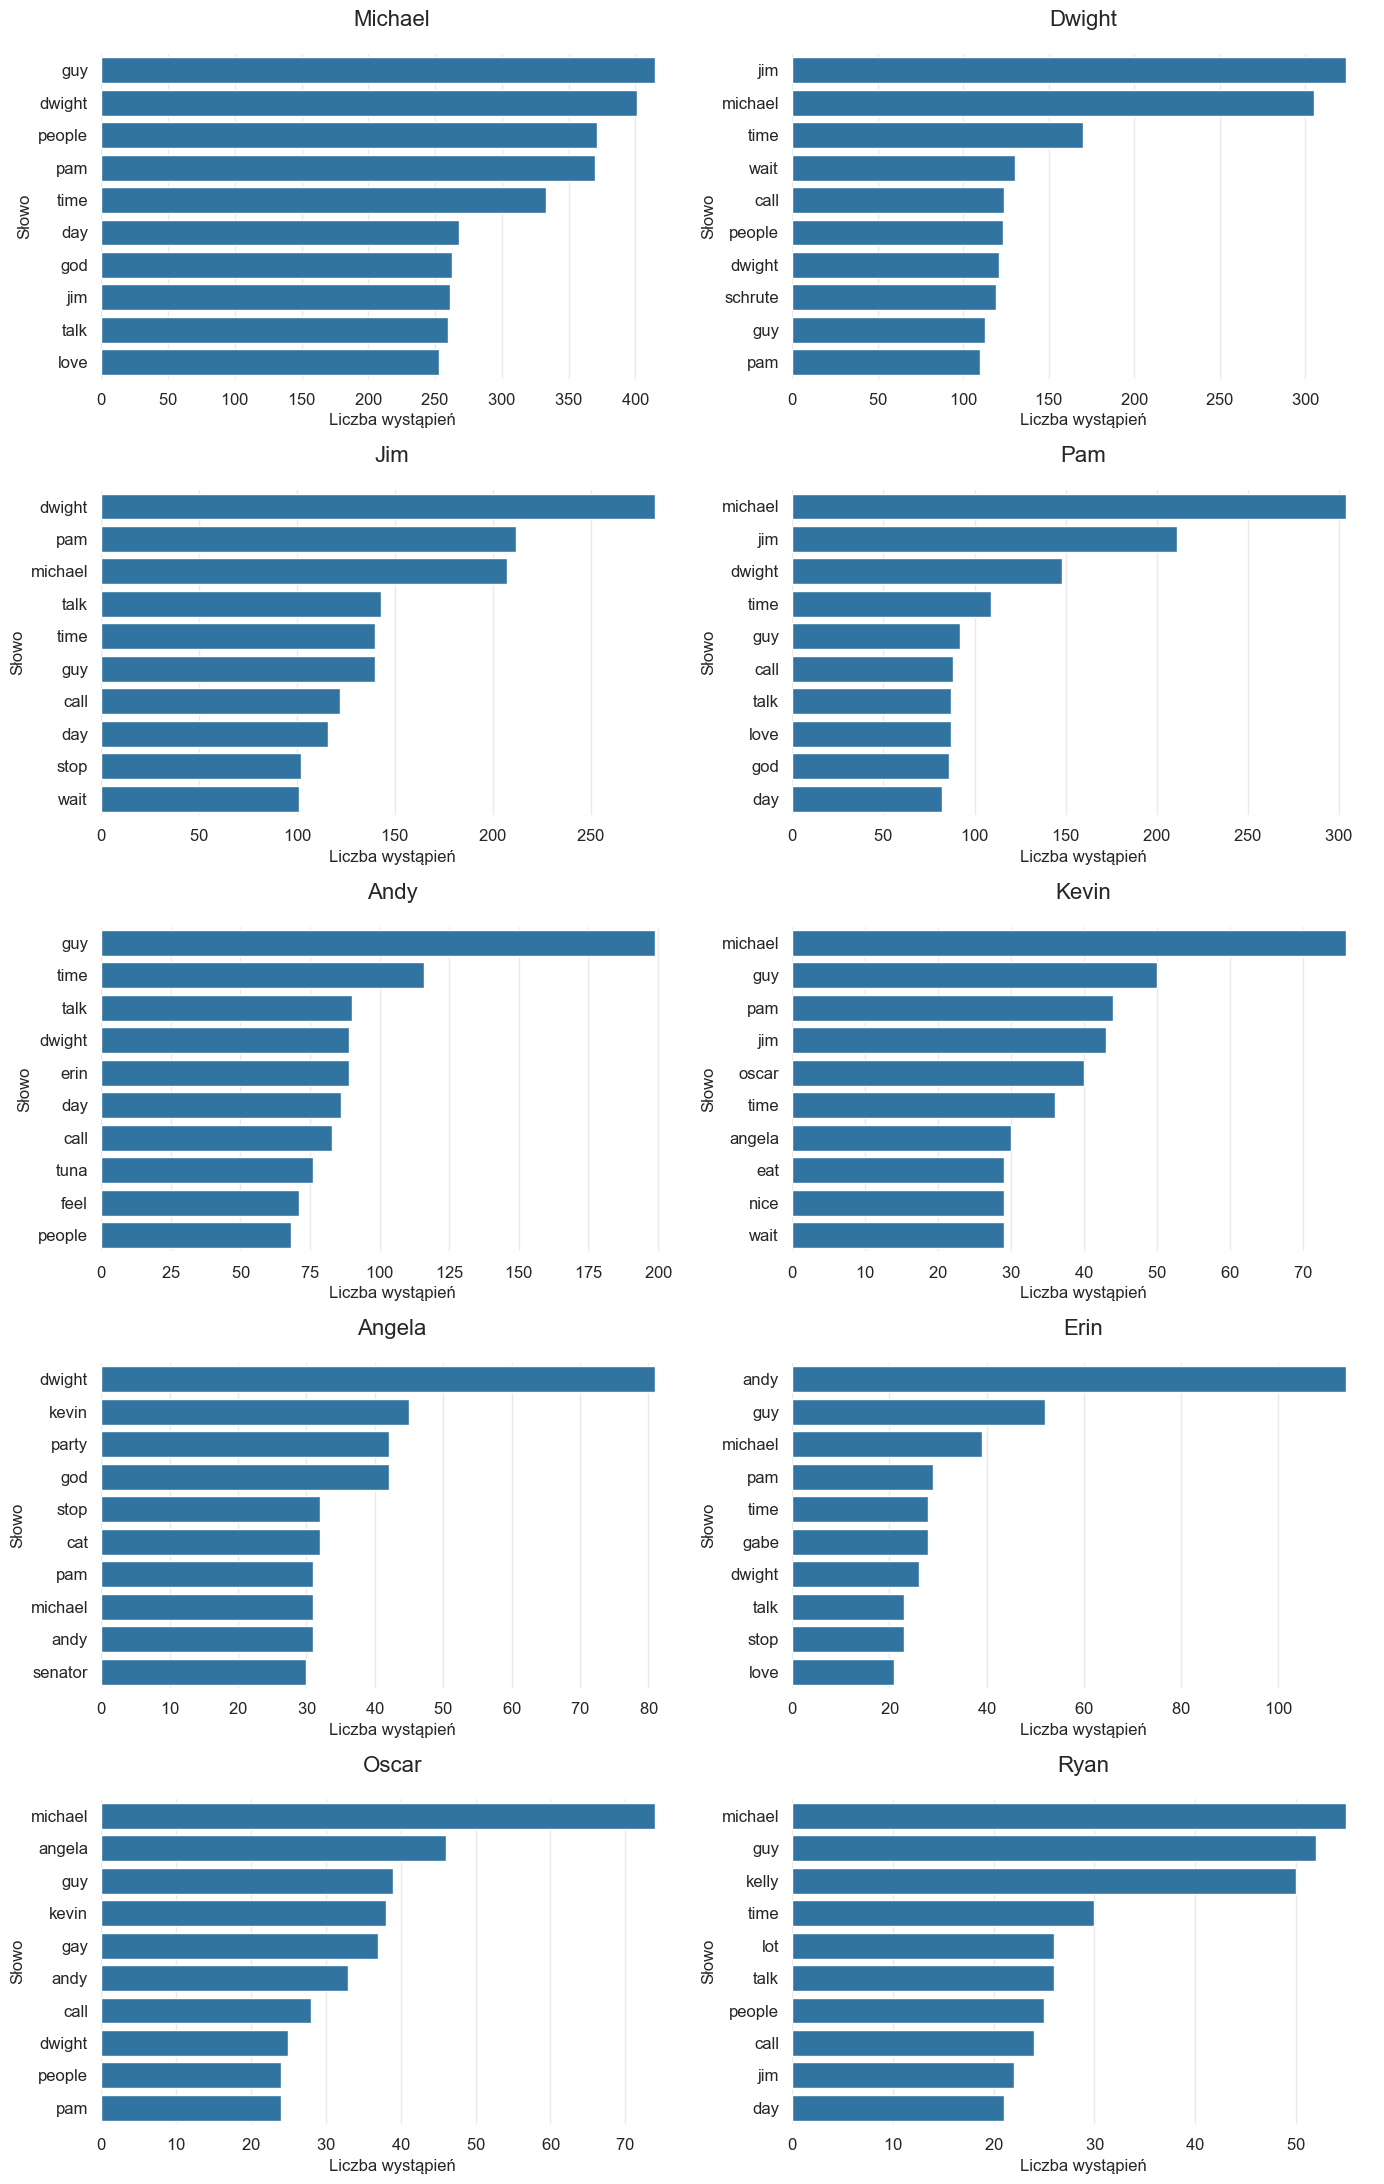

In [368]:
fig, axs = plt.subplots(5, 2, figsize=(14, 22))
index = 1

for index, character in enumerate(top_characters):
    ax = axs[index // 2, index % 2]
    lines = df.loc[df['character'] == character, 'line_preprocessed']
    all_lines = ' '.join(lines.tolist()) 
    top_words = get_top_n_words(all_lines, n_words=10)
    counts = [all_lines.split().count(word) for word in top_words]
    sns.barplot(x=counts, y=top_words, ax=ax)
    ax.set_title(character)
    ax.set_xlabel('Liczba wystąpień')
    ax.set_ylabel('Słowo')
    
# plt.suptitle('Top words by characters', fontsize=24)
fig.tight_layout()

plt.savefig('plots/top_slowa_postaci.pdf')

In [369]:
df = df[df['line_preprocessed'].map(lambda d: len(d)) > 0]
df.to_csv('preprocessed_df.csv')
df

season  episode  scene  \
0           1        1      1   
1           1        1      1   
2           1        1      1   
3           1        1      1   
5           1        1      2   
...       ...      ...    ...   
59904       9       23    112   
59905       9       23    113   
59906       9       23    114   
59907       9       23    115   
59908       9       23    116   

                                                    line character  \
0      All right Jim. Your quarterlies look very good...   Michael   
1             Oh, I told you. I couldn't close it. So...       Jim   
2      So you've come to the master for guidance? Is ...   Michael   
3             Actually, you called me in here, but yeah.       Jim   
5      [on the phone] Yes, I'd like to speak to your ...   Michael   
...                                                  ...       ...   
59904  It all seems so very arbitrary. I applied for ...     Creed   
59905  I just feel lucky that I got a chance to share...  Meredith   
59906  I'm happy that this was all filmed so I can re...   Phyllis   
59907  I sold paper at this company for 12 years. My ...       Jim   
59908  I thought it was weird when you picked us to m...       Pam   

                                       line_preprocessed  
0                                jim quarterlies library  
1                                             tell close  
2                            master guidance grasshopper  
3                                                   call  
5      speak office manager michael scott regional ma...  
...                                                  ...  
59904  arbitrary apply job company hiring desk empty ...  
59905  feel lucky chance share crummy story dump pape...  
59906          happy filmed remember paper company write  
59907  sell paper company job speak client phone quan...  
59908  weird pick documentary ordinary paper company ...  

[44509 rows x 6 columns]

In [528]:
def get_top_unique_ngrams(n_words=10, ngram_range=(1,1), max_df=0.03, min_df=1):
    lines_by_character = df.groupby('character')['line_preprocessed'].apply(lambda x: ' '.join(x))

    vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_df=max_df, min_df=min_df)
    tfidf = vectorizer.fit_transform(lines_by_character.values)
    
    unique_words = {}

    feature_names = vectorizer.get_feature_names_out()
    for i, character in enumerate(lines_by_character.index):
        if character in top_characters:
            tfidf_scores = tfidf[i, :].toarray()[0]
            top_indices = tfidf_scores.argsort()[-n_words:][::-1]
            top_words = {}
            for j in top_indices:
                top_words[feature_names[j]] =  tfidf_scores[j]

            unique_words[character] = top_words
    return unique_words

In [529]:
def plot_top_unique_ngrams(ngram_range, ylabel, path, n_words=10):
    top_unique_ngrams = get_top_unique_ngrams(n_words=n_words, ngram_range=ngram_range)

    fig, axs = plt.subplots(5, 2, figsize=(14, 22))
    index = 1
    for index, character in enumerate(top_characters):
        ax = axs[index // 2, index % 2]
        top_words = list(top_unique_ngrams[character].keys())
        counts = list(top_unique_ngrams[character].values())
        sns.barplot(x=counts, y=top_words, ax=ax)
        ax.set_title(character)
        ax.set_xlabel('Wartość TF-IDF')
        ax.set_ylabel(ylabel)
        index += 1

    # plt.suptitle(title, fontsize=24)
    fig.tight_layout()
    # plt.show()
    plt.savefig(path)

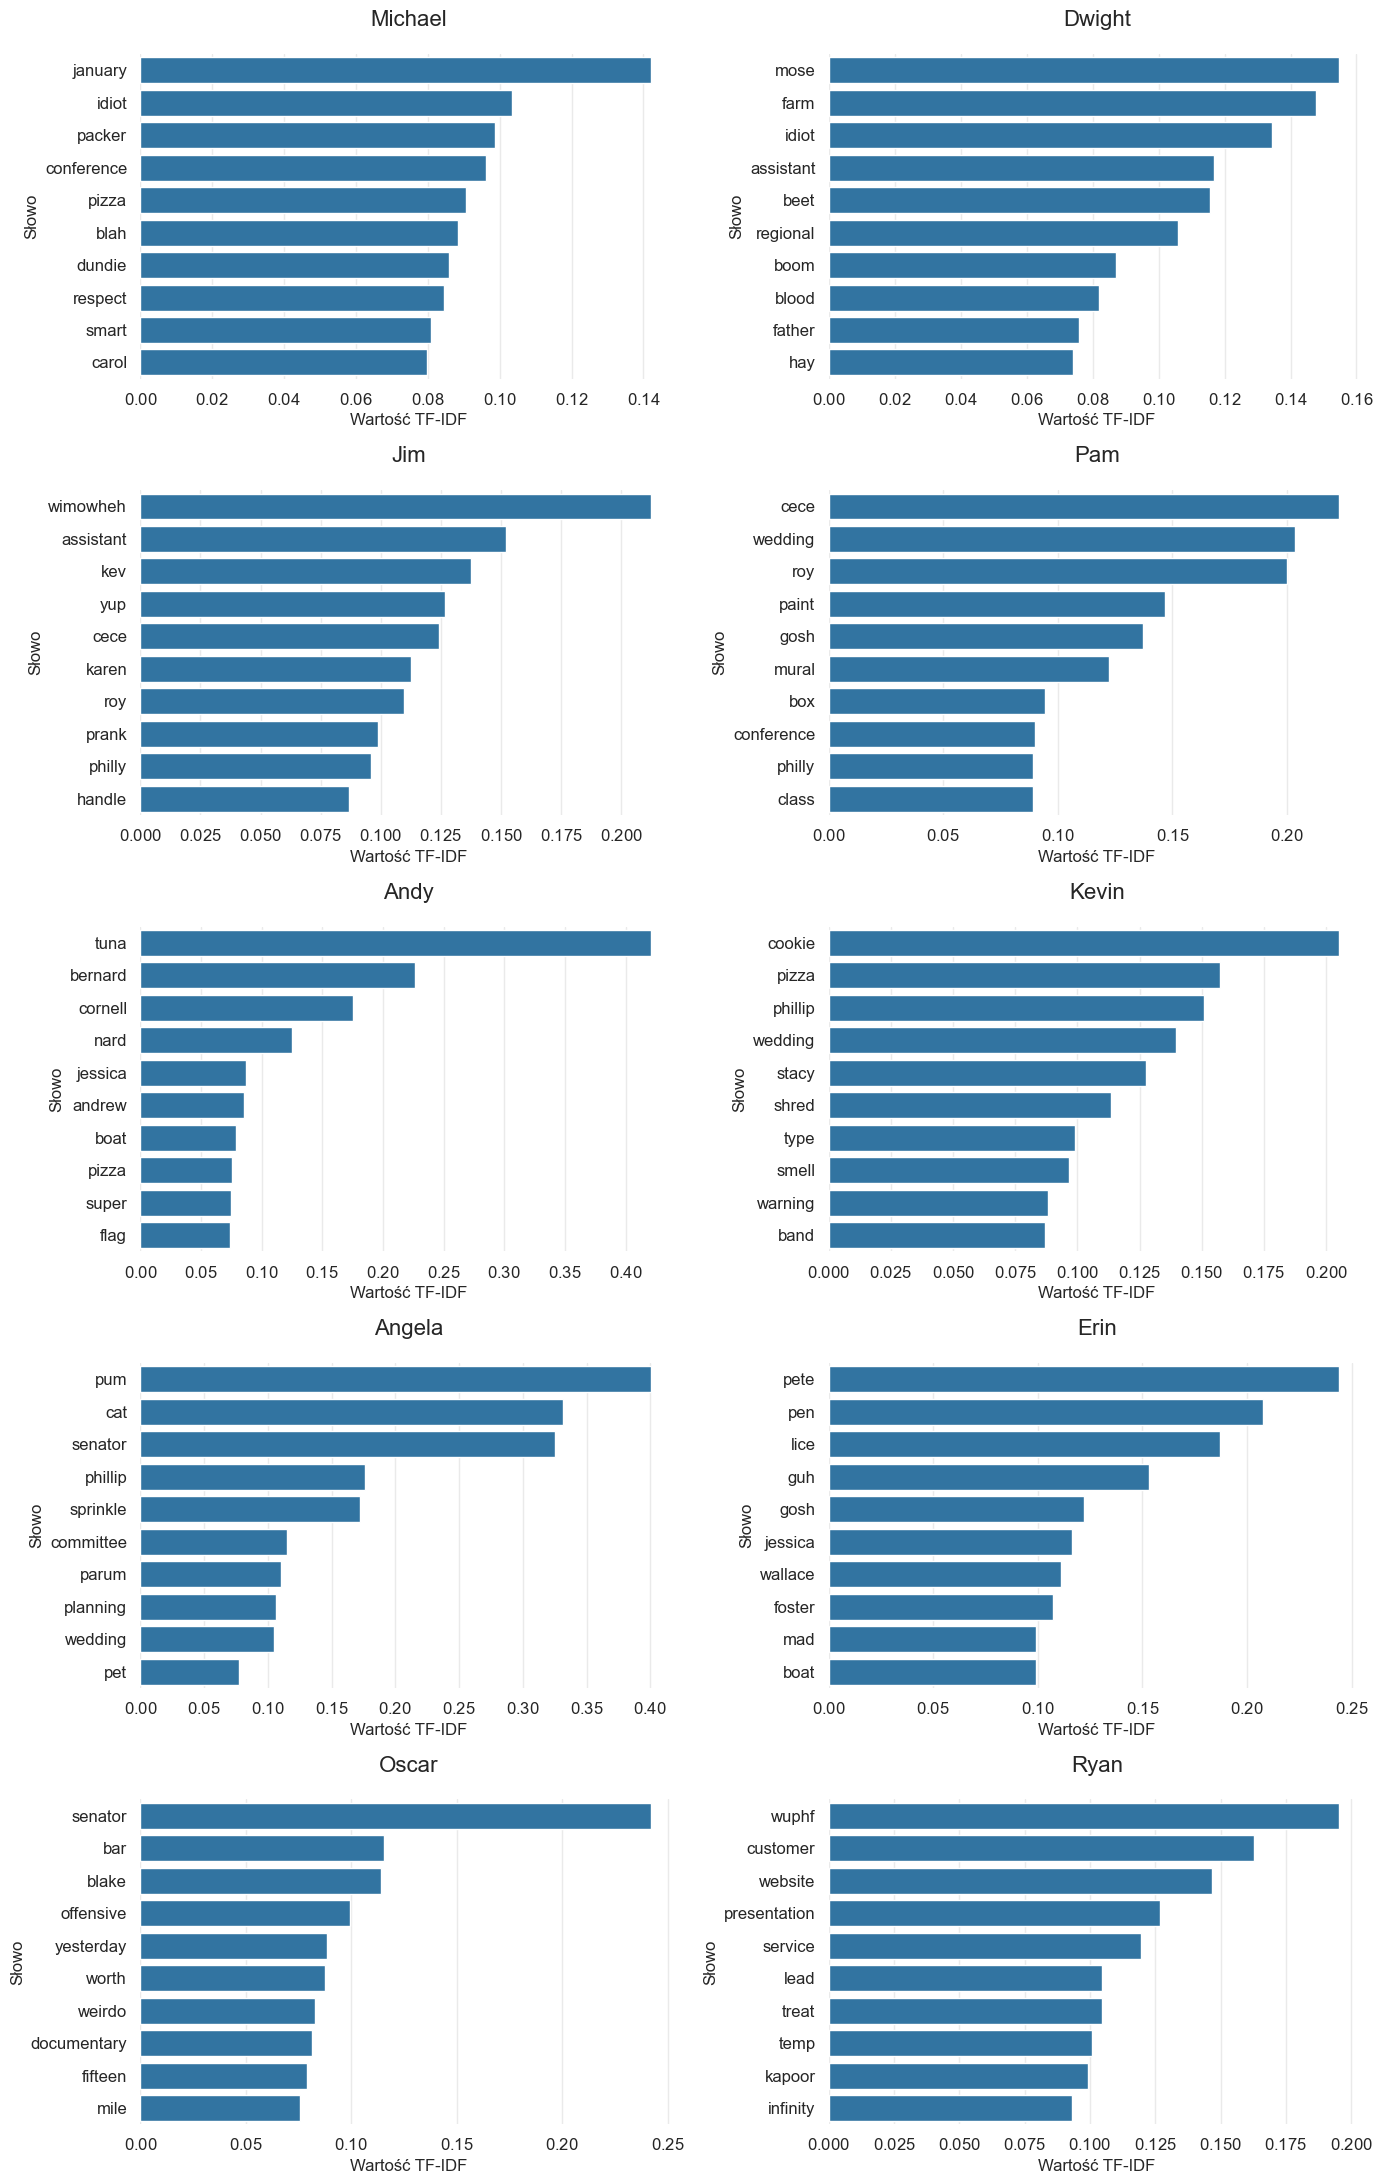

In [530]:
plot_top_unique_ngrams(ngram_range=(1,1), ylabel='Słowo', path='plots/top_slowa_tfidf.pdf')

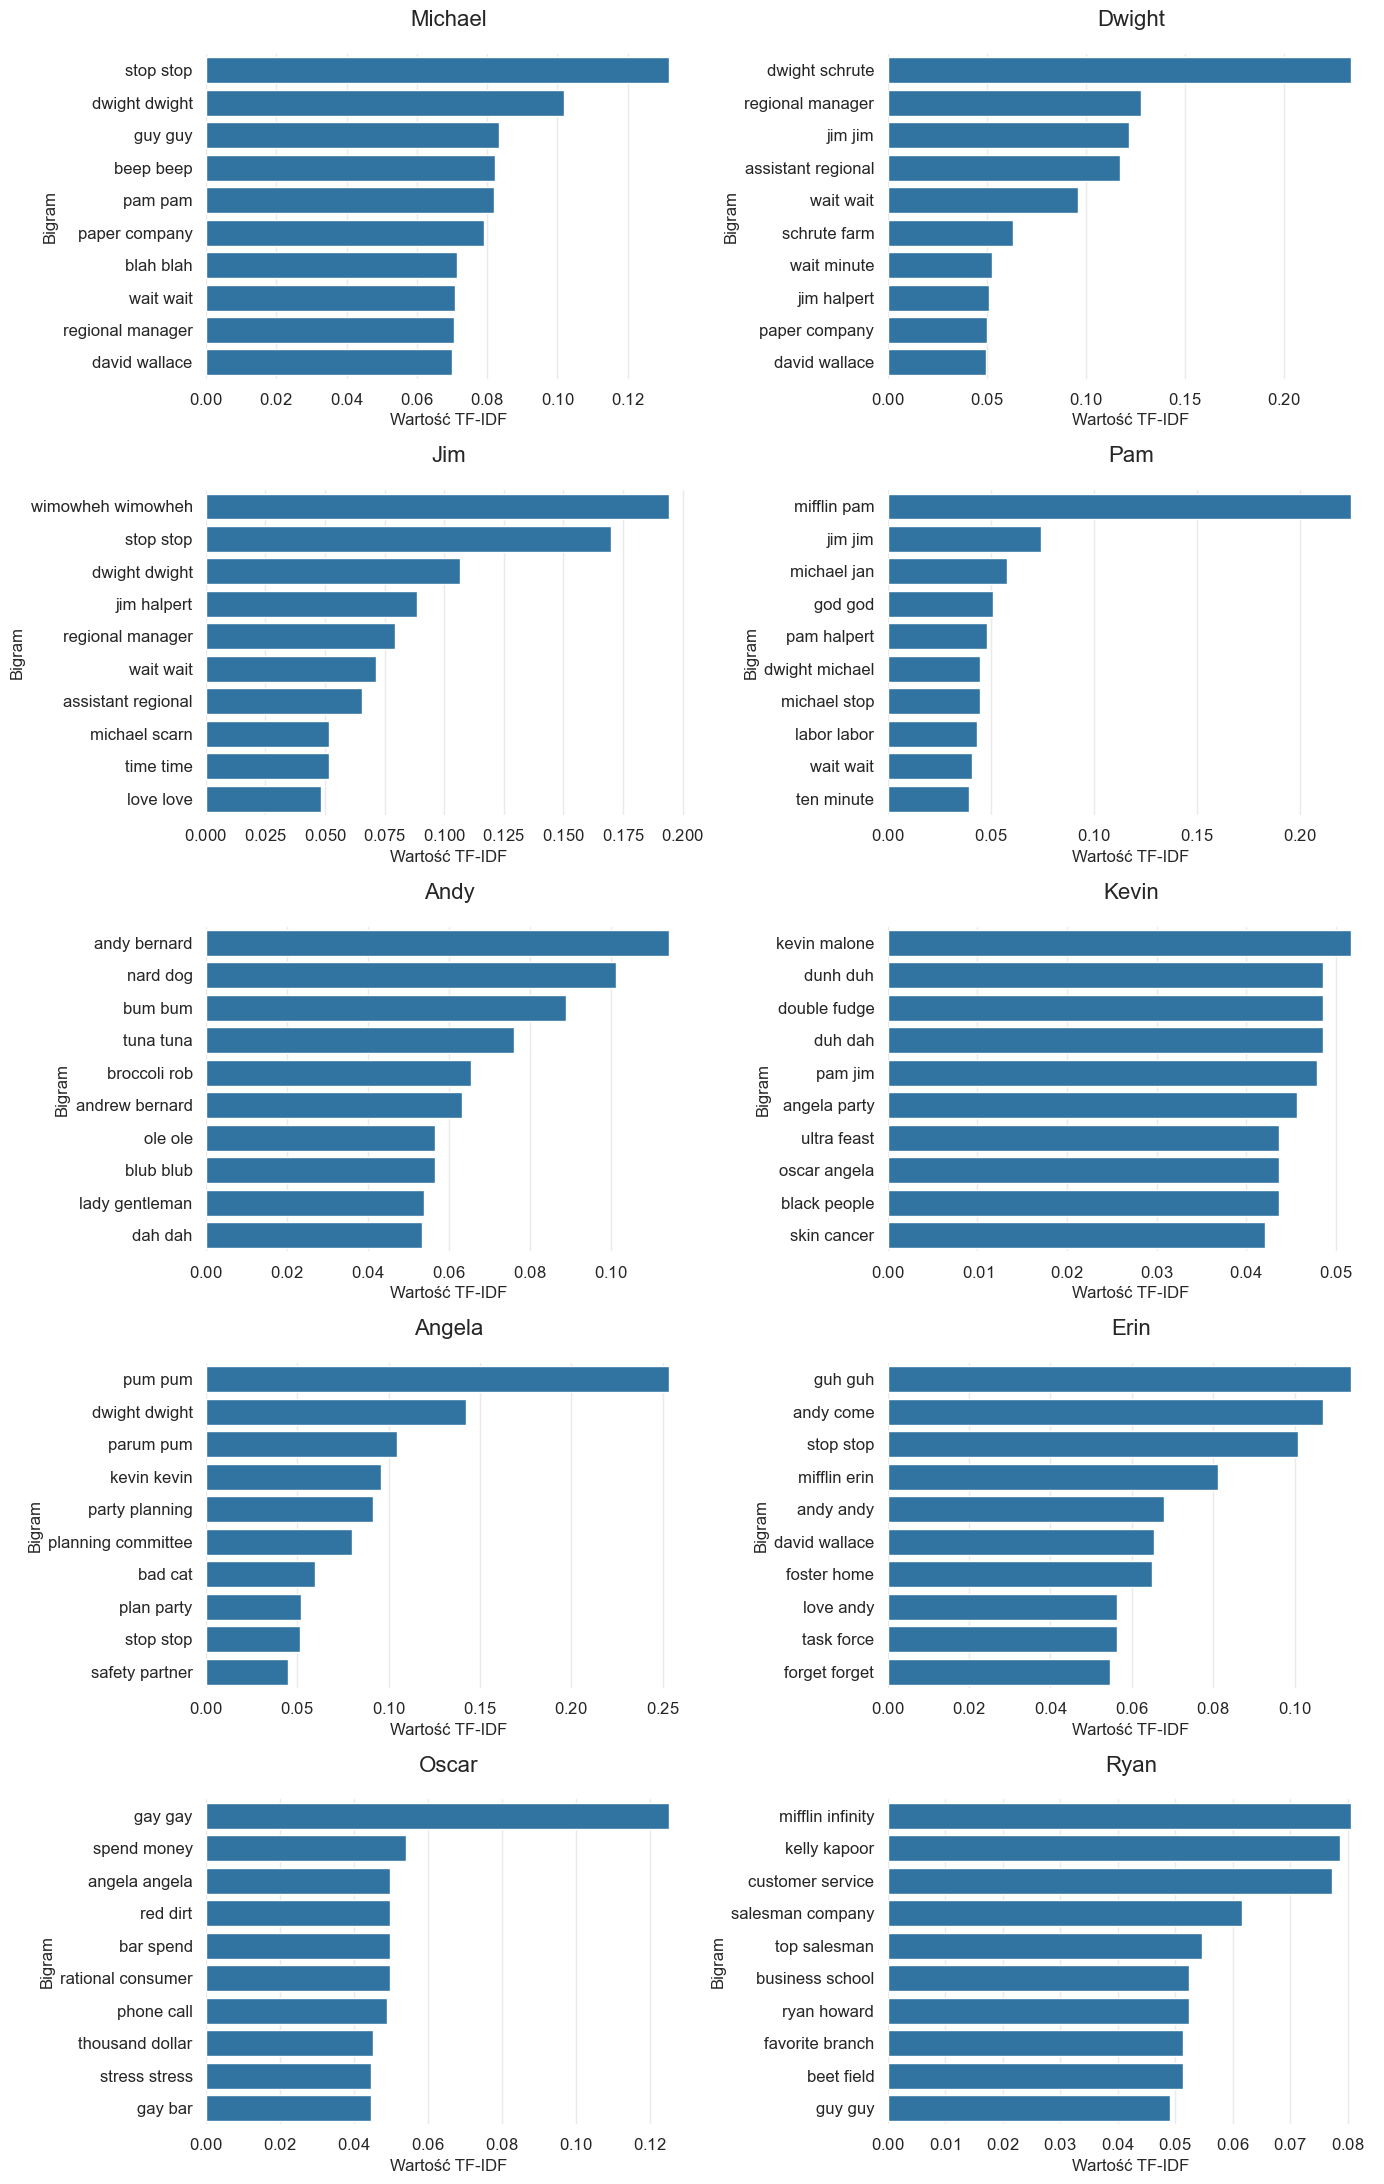

In [565]:
plot_top_unique_ngrams(ngram_range=(2,2), ylabel='Bigram', path='plots/top_bigramy_tfidf.pdf')

## TF-IDF mask

In [85]:
def generate_wordcloud(character, img_path=None, out_path=None):
    
    unique_words = get_top_unique_ngrams(n_words=100, ngram_range=(1,1))
    word_dict = unique_words[character]
        
    mask = np.array(Image.open(img_path))    
    wordcloud = WordCloud(width=800, height=400, background_color='white', mode='RGBA', mask=mask).generate_from_frequencies(word_dict)
    
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=[7,7])
    plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
    wordcloud.to_file(out_path)
    plt.axis('off')
    plt.show()

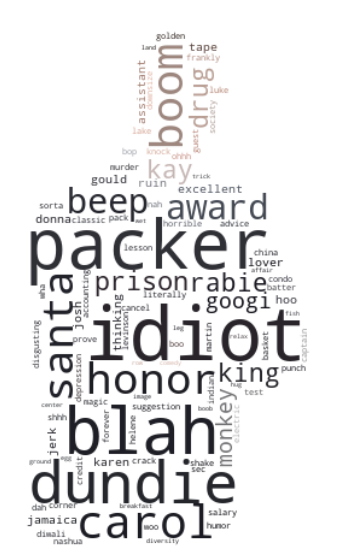

In [86]:
generate_wordcloud(character='Michael', img_path='img/michael.png', out_path='output/tfidf_michael.png')

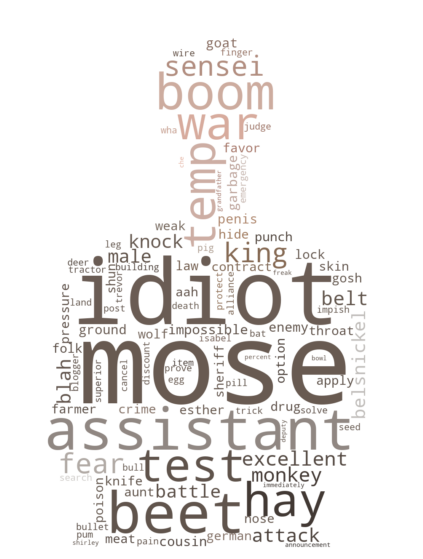

In [87]:
generate_wordcloud(character='Dwight', img_path='img/dwight.png', out_path='output/tfidf_dwight.png')

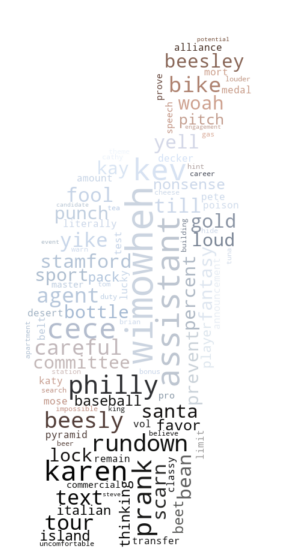

In [88]:
generate_wordcloud(character='Jim', img_path='img/jim.png', out_path='output/tfidf_jim.png')

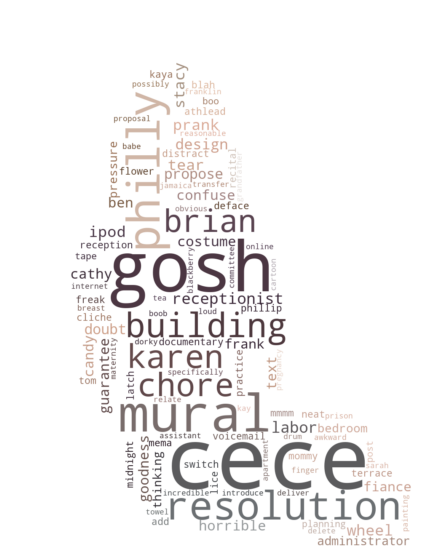

In [89]:
generate_wordcloud(character='Pam', img_path='img/pam.png', out_path='output/tfidf_pam.png')

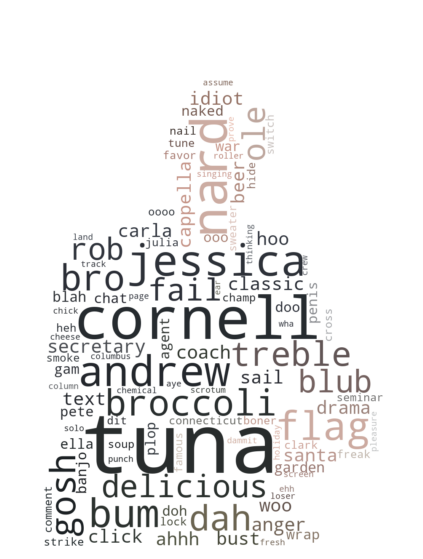

In [90]:
generate_wordcloud(character='Andy', img_path='img/andy.png', out_path='output/tfidf_andy.png')

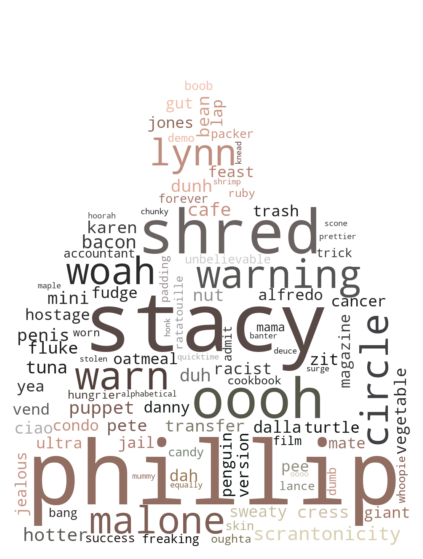

In [91]:
generate_wordcloud(character='Kevin', img_path='img/kevin.png', out_path='output/tfidf_kevin.png')

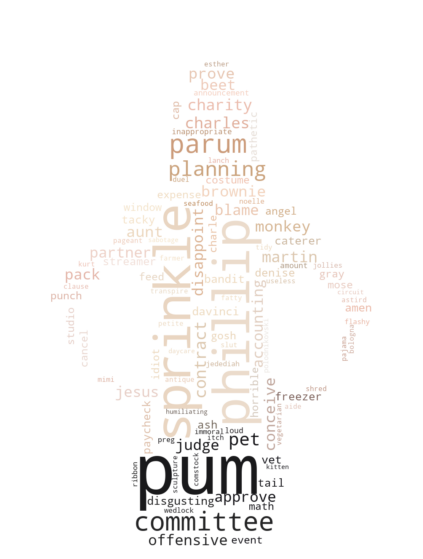

In [92]:
generate_wordcloud(character='Angela', img_path='img/angela.png', out_path='output/tfidf_angela.png')

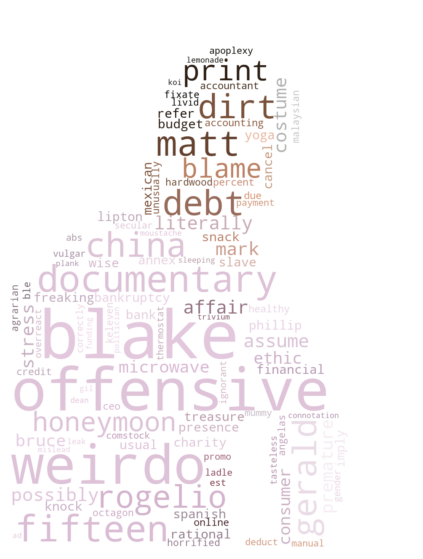

In [93]:
generate_wordcloud(character='Oscar', img_path='img/oscar.png', out_path='output/tfidf_oscar.png')

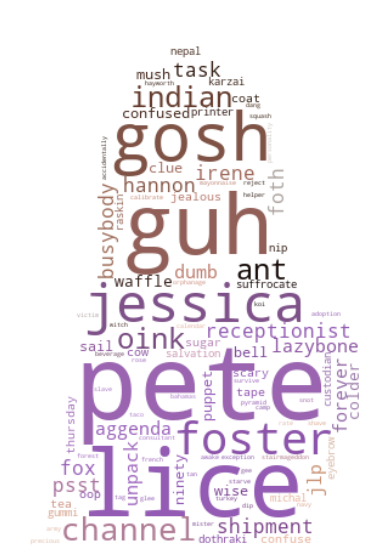

In [94]:
generate_wordcloud(character='Erin', img_path='img/erin.png', out_path='output/tfidf_erin.png')

## TF-IDF no mask

In [453]:
def generate_wordcloud_no_mask(character, out_path=None):
    
    unique_words = get_top_unique_ngrams(n_words=100, ngram_range=(1,1), max_df=0.03)
    word_dict = unique_words[character]
          
    wordcloud = WordCloud(width=800, height=400, background_color='white', mode='RGBA').generate_from_frequencies(word_dict)
    
    plt.figure(figsize=[7,7])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig(out_path, bbox_inches='tight', pad_inches=0)

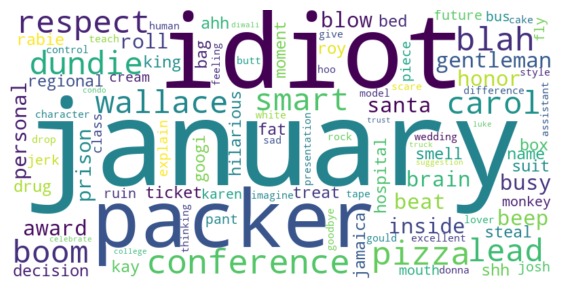

In [454]:
generate_wordcloud_no_mask(character='Michael', out_path='wordclouds_no_mask/tfidf_michael.pdf')

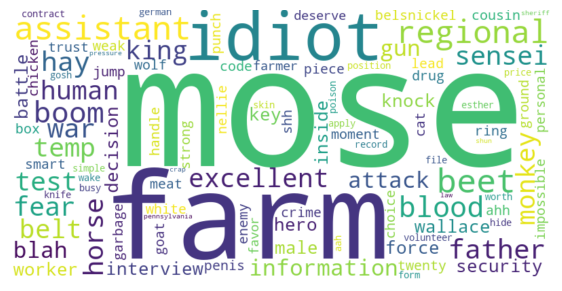

In [455]:
generate_wordcloud_no_mask(character='Dwight', out_path='wordclouds_no_mask/tfidf_dwight.pdf')

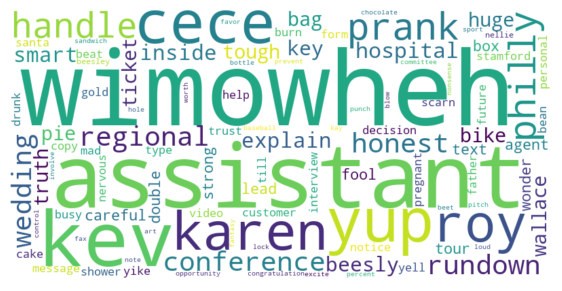

In [457]:
generate_wordcloud_no_mask(character='Jim', out_path='wordclouds_no_mask/tfidf_jim.pdf')

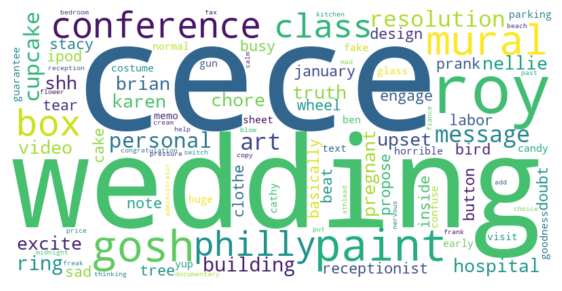

In [458]:
generate_wordcloud_no_mask(character='Pam', out_path='wordclouds_no_mask/tfidf_pam.pdf')

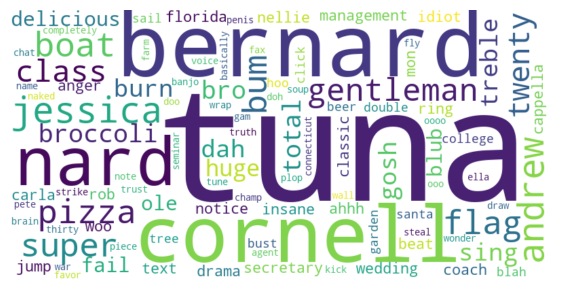

In [463]:
generate_wordcloud_no_mask(character='Andy', out_path='wordclouds_no_mask/tfidf_andy.pdf')

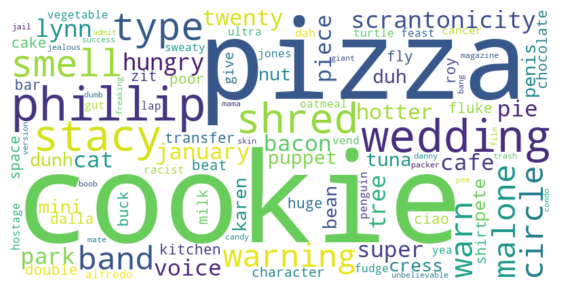

In [465]:
generate_wordcloud_no_mask(character='Kevin', out_path='wordclouds_no_mask/tfidf_kevin.pdf')

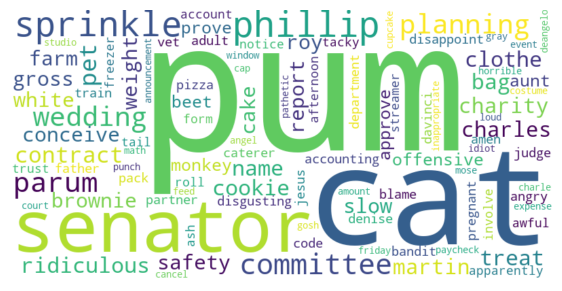

In [466]:
generate_wordcloud_no_mask(character='Angela', out_path='wordclouds_no_mask/tfidf_angela.pdf')

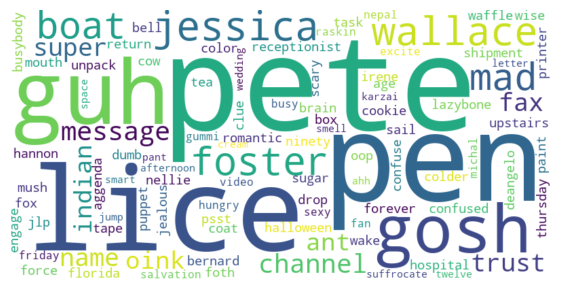

In [563]:
generate_wordcloud_no_mask(character='Erin', out_path='wordclouds_no_mask/tfidf_erin.pdf')

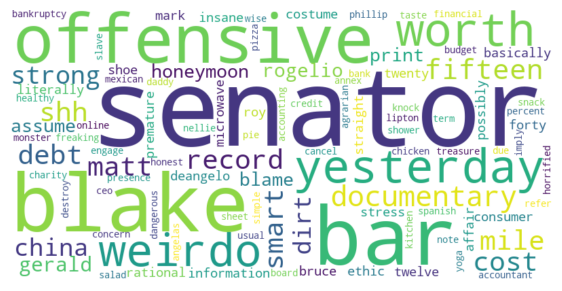

In [554]:
generate_wordcloud_no_mask(character='Oscar', out_path='wordclouds_no_mask/tfidf_oscar.pdf')

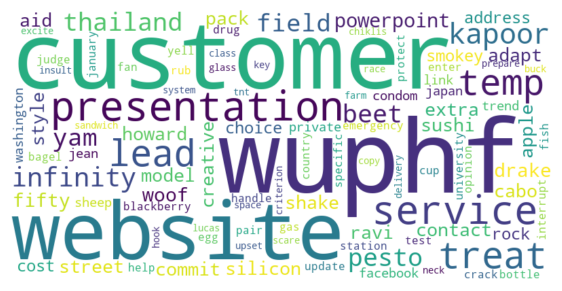

In [545]:
generate_wordcloud_no_mask(character='Ryan', out_path='wordclouds_no_mask/tfidf_ryan.pdf')

## TF-IDF dataframe results

In [478]:
unique_words = get_top_unique_ngrams(n_words=10, ngram_range=(1,1), max_df=0.05, min_df=1)
word_dict = unique_words['Michael']
word_dict

{'stanley': 0.18815648387900732,
 'jan': 0.16983366673732855,
 'phyllis': 0.16184060587728064,
 'holly': 0.1283235939096418,
 'sort': 0.11211429783684494,
 'meredith': 0.10740522609182786,
 'david': 0.1027068123904683,
 'person': 0.10142297723558746,
 'wrong': 0.10022154821797194,
 'hot': 0.09650963902471373}

In [413]:
df['character'].nunique()

705

In [ ]:
def generate_wordcloud_no_mask(character, out_path=None):
    
    unique_words = get_top_unique_ngrams(n_words=100, ngram_range=(1,1), max_df=0.03, min_df=2)
    word_dict = unique_words[character]
          
    wordcloud = WordCloud(width=800, height=400, background_color='white', mode='RGBA').generate_from_frequencies(word_dict)
    
    plt.figure(figsize=[7,7])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    # plt.savefig(out_path, bbox_inches='tight', pad_inches=0)

In [533]:
unique_words = get_top_unique_ngrams(n_words=10, ngram_range=(1,1), max_df=0.03)
records = []
for character, words in unique_words.items():
    record = {'Character': character}
    for i, (word, score) in enumerate(words.items(), 1):
        record[f'Word {i}'] = word
        record[f'TF-IDF {i}'] = score
    records.append(record)
    
tfidf_df = pd.DataFrame(records)
tfidf_df = tfidf_df.set_index('Character')
tfidf_df = tfidf_df.reindex(top_characters)
tfidf_df = tfidf_df.reset_index()
tfidf_df = tfidf_df.round(2)
tfidf_df

Character    Word 1  TF-IDF 1     Word 2  TF-IDF 2   Word 3  TF-IDF 3  \
0   Michael   january      0.14      idiot      0.10   packer      0.10   
1    Dwight      mose      0.15       farm      0.15    idiot      0.13   
2       Jim  wimowheh      0.21  assistant      0.15      kev      0.14   
3       Pam      cece      0.22    wedding      0.20      roy      0.20   
4      Andy      tuna      0.42    bernard      0.23  cornell      0.18   
5     Kevin    cookie      0.21      pizza      0.16  phillip      0.15   
6    Angela       pum      0.40        cat      0.33  senator      0.33   
7      Erin      pete      0.24        pen      0.21     lice      0.19   
8     Oscar   senator      0.24        bar      0.12    blake      0.11   
9      Ryan     wuphf      0.20   customer      0.16  website      0.15   

         Word 4  TF-IDF 4     Word 5  ...     Word 6 TF-IDF 6   Word 7  \
0    conference      0.10      pizza  ...       blah     0.09   dundie   
1     assistant      0.12       beet  ...   regional     0.11     boom   
2           yup      0.13       cece  ...      karen     0.11      roy   
3         paint      0.15       gosh  ...      mural     0.12      box   
4          nard      0.12    jessica  ...     andrew     0.09     boat   
5       wedding      0.14      stacy  ...      shred     0.11     type   
6       phillip      0.18   sprinkle  ...  committee     0.11    parum   
7           guh      0.15       gosh  ...    jessica     0.12  wallace   
8     offensive      0.10  yesterday  ...      worth     0.09   weirdo   
9  presentation      0.13    service  ...       lead     0.10    treat   

  TF-IDF 7       Word 8 TF-IDF 8   Word 9 TF-IDF 9   Word 10 TF-IDF 10  
0     0.09      respect     0.08    smart     0.08     carol      0.08  
1     0.09        blood     0.08   father     0.08       hay      0.07  
2     0.11        prank     0.10   philly     0.10    handle      0.09  
3     0.09   conference     0.09   philly     0.09     class      0.09  
4     0.08        pizza     0.08    super     0.07      flag      0.07  
5     0.10        smell     0.10  warning     0.09      band      0.09  
6     0.11     planning     0.11  wedding     0.10       pet      0.08  
7     0.11       foster     0.11      mad     0.10      boat      0.10  
8     0.08  documentary     0.08  fifteen     0.08      mile      0.08  
9     0.10         temp     0.10   kapoor     0.10  infinity      0.09  

[10 rows x 21 columns]

In [534]:
latex_code = tfidf_df.to_latex(index=False, escape=False, float_format="%.2f")
print(latex_code)

\begin{tabular}{llrlrlrlrlrlrlrlrlrlr}
\toprule
Character & Word 1 & TF-IDF 1 & Word 2 & TF-IDF 2 & Word 3 & TF-IDF 3 & Word 4 & TF-IDF 4 & Word 5 & TF-IDF 5 & Word 6 & TF-IDF 6 & Word 7 & TF-IDF 7 & Word 8 & TF-IDF 8 & Word 9 & TF-IDF 9 & Word 10 & TF-IDF 10 \\
\midrule
Michael & january & 0.14 & idiot & 0.10 & packer & 0.10 & conference & 0.10 & pizza & 0.09 & blah & 0.09 & dundie & 0.09 & respect & 0.08 & smart & 0.08 & carol & 0.08 \\
Dwight & mose & 0.15 & farm & 0.15 & idiot & 0.13 & assistant & 0.12 & beet & 0.12 & regional & 0.11 & boom & 0.09 & blood & 0.08 & father & 0.08 & hay & 0.07 \\
Jim & wimowheh & 0.21 & assistant & 0.15 & kev & 0.14 & yup & 0.13 & cece & 0.12 & karen & 0.11 & roy & 0.11 & prank & 0.10 & philly & 0.10 & handle & 0.09 \\
Pam & cece & 0.22 & wedding & 0.20 & roy & 0.20 & paint & 0.15 & gosh & 0.14 & mural & 0.12 & box & 0.09 & conference & 0.09 & philly & 0.09 & class & 0.09 \\
Andy & tuna & 0.42 & bernard & 0.23 & cornell & 0.18 & nard & 0.12 & jessica 

## TF-IDF for seasons

In [482]:
def get_top_unique_ngrams_by_season(n_words=10, ngram_range=(1,1), max_df=0.05):
    lines_by_season = df.groupby('season')['line_preprocessed'].apply(lambda x: ' '.join(x))

    vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_df=max_df)
    tfidf = vectorizer.fit_transform(lines_by_season.values)

    seasons = df['season'].unique()
    
    unique_words = {}

    feature_names = vectorizer.get_feature_names_out()
    for i, season in enumerate(lines_by_season.index):
        if season in seasons:
            tfidf_scores = tfidf[i, :].toarray()[0]
            top_indices = tfidf_scores.argsort()[-n_words:][::-1]
            top_words = {}
            for j in top_indices:
                top_words[feature_names[j]] = tfidf_scores[j]

            unique_words[season] = top_words
    return unique_words

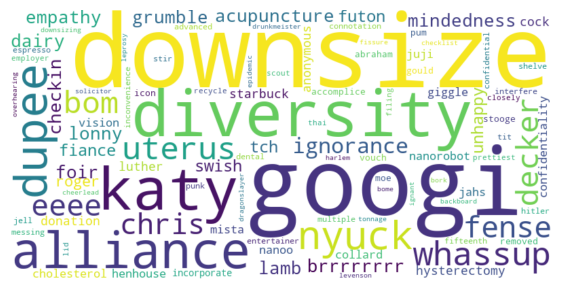

In [506]:
# for season in range(1,10):
#     unique_words = get_top_unique_ngrams_by_season(n_words=50, ngram_range=(1,1))
#     word_dict = unique_words[season]
#     print(season)
#     print(word_dict)

season = 1
unique_words = get_top_unique_ngrams_by_season(n_words=100, ngram_range=(1,1), max_df=0.5)
word_dict = unique_words[season]

wordcloud = WordCloud(width=800, height=400, background_color='white', mode='RGBA').generate_from_frequencies(word_dict)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()